In [1]:
import tweepy
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
from twitterkeys import consumer_key, consumer_secret, access_token, access_token_secret
import pandas as pd

In [2]:
# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#BBC, CBS, CNN, Fox, and New York times**

news_targets = ['@BBCWorld','@CBSNews','@cnn','@FoxNews','nytimes']


In [13]:
sentiments = {}
for target in news_targets:
    time = []
    pos = []
    neg = []
    neu = []
    comp = []
    text = []
    tweetsago = []
    tweet_num = 1
    public_tweets = api.user_timeline(target, count = 100)
    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet['text'])
        pos.append(results['pos'])
        neg.append(results['neg'])
        neu.append(results['neu'])
        comp.append(results['compound'])
        time.append(tweet['created_at'])
        tweetsago.append(tweet_num)
        tweet_num += 1
        text.append(tweet['text'])
    df = pd.DataFrame({'Time':time, 
                       'Positive':pos, 
                       'Negative':neg,
                       'Neutral':neu,
                       'Compound':comp,
                       'Tweets Ago':tweetsago,
                       'Text':text})
    sentiments[target] = df

In [185]:
sentiments['nytimes']['Time']

0     Sun Aug 05 03:49:38 +0000 2018
1     Sun Aug 05 03:31:27 +0000 2018
2     Sun Aug 05 03:13:46 +0000 2018
3     Sun Aug 05 02:55:50 +0000 2018
4     Sun Aug 05 02:52:23 +0000 2018
5     Sun Aug 05 02:35:05 +0000 2018
6     Sun Aug 05 02:17:37 +0000 2018
7     Sun Aug 05 02:01:11 +0000 2018
8     Sun Aug 05 02:01:05 +0000 2018
9     Sun Aug 05 01:43:02 +0000 2018
10    Sun Aug 05 01:07:11 +0000 2018
11    Sun Aug 05 00:54:46 +0000 2018
12    Sun Aug 05 00:35:53 +0000 2018
13    Sun Aug 05 00:24:07 +0000 2018
14    Sun Aug 05 00:06:12 +0000 2018
15    Sun Aug 05 00:05:06 +0000 2018
16    Sun Aug 05 00:03:21 +0000 2018
17    Sat Aug 04 23:42:51 +0000 2018
18    Sat Aug 04 23:26:31 +0000 2018
19    Sat Aug 04 23:22:01 +0000 2018
20    Sat Aug 04 23:04:19 +0000 2018
21    Sat Aug 04 22:51:40 +0000 2018
22    Sat Aug 04 22:41:59 +0000 2018
23    Sat Aug 04 22:24:39 +0000 2018
24    Sat Aug 04 22:07:05 +0000 2018
25    Sat Aug 04 21:50:34 +0000 2018
26    Sat Aug 04 21:33:14 +0000 2018
2

news_targets = ['@BBCWorld','@CBSNews','@cnn','@FoxNews','nytimes']

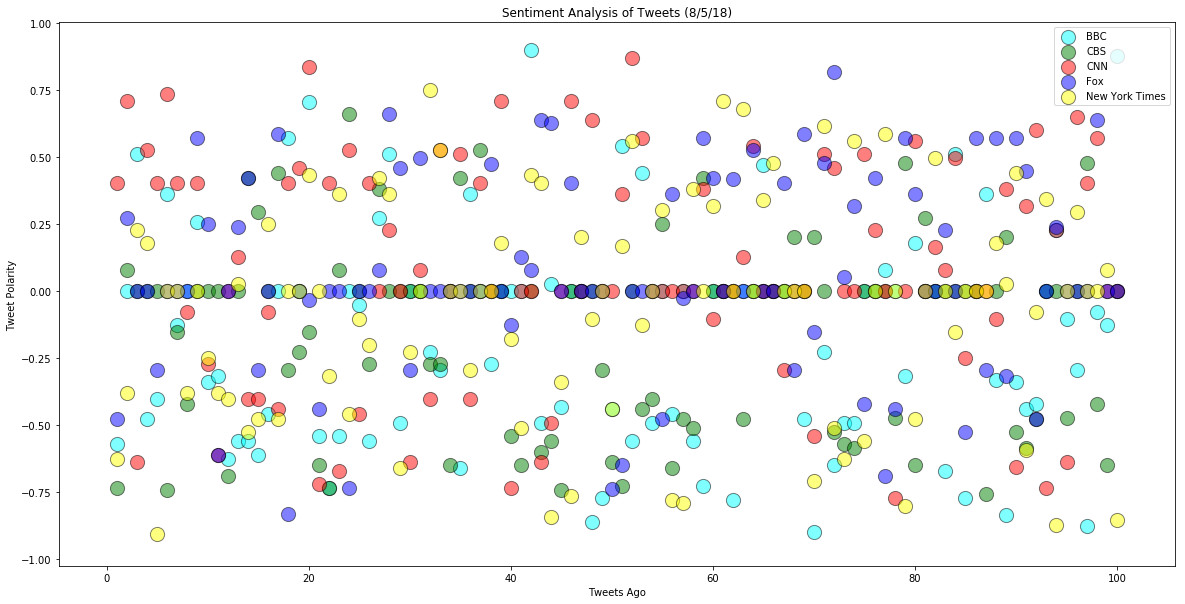

In [156]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.scatter(sentiments['@BBCWorld']['Tweets Ago'],sentiments['@BBCWorld']['Compound'], c = 'cyan',label = 'BBC', alpha= 0.5, s=200, edgecolors='k')
ax1.scatter(sentiments['@CBSNews']['Tweets Ago'],sentiments['@CBSNews']['Compound'], c = 'g', label = 'CBS', alpha= 0.5, s=200, edgecolors='k')
ax1.scatter(sentiments['@cnn']['Tweets Ago'],sentiments['@cnn']['Compound'], c = 'r', label = 'CNN', alpha= 0.5, s=200, edgecolors='k')
ax1.scatter(sentiments['@FoxNews']['Tweets Ago'],sentiments['@FoxNews']['Compound'], c = 'b', label = 'Fox', alpha= 0.5, s=200, edgecolors='k')
ax1.scatter(sentiments['nytimes']['Tweets Ago'],sentiments['nytimes']['Compound'], c = 'yellow', label = 'New York Times', alpha= 0.5, s=200, edgecolors='k')

plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Tweets (8/5/18)')
plt.legend(loc = 'best')
plt.savefig('scatter.png')
plt.show()

In [169]:
neutral_sentiments = {}
for k,v in sentiments.items():
    neutral_sentiments[k] = len(v['Compound'][(v['Compound'] <= 0.1) & (v['Compound']>= -0.1)])
neutral_sentiments = pd.DataFrame(neutral_sentiments, index = ['# Neutral Tweets'])
neutral_sentiments.T.sort_values(by='# Neutral Tweets', ascending=False)

,# Neutral Tweets
@CBSNews,45
@FoxNews,45
@cnn,35
@BBCWorld,34
nytimes,33


In [174]:
positive_sentiments = {}
for k,v in sentiments.items():
    positive_sentiments[k] = len(v['Compound'][v['Compound']> 0.1])
positive_sentiments = pd.DataFrame(positive_sentiments, index = ['# Positive Tweets'])
positive_sentiments.T.sort_values(by='# Positive Tweets', ascending=False)

,# Positive Tweets
@cnn,41
@FoxNews,34
nytimes,30
@BBCWorld,17
@CBSNews,15


In [175]:
negative_sentiments = {}
for k,v in sentiments.items():
    negative_sentiments[k] = len(v['Compound'][v['Compound']< 0.1])
negative_sentiments = pd.DataFrame(negative_sentiments, index = ['# Negative Tweets'])
negative_sentiments.T.sort_values(by='# Negative Tweets', ascending=False)

,# Negative Tweets
@CBSNews,85
@BBCWorld,83
nytimes,70
@FoxNews,66
@cnn,59


In [ ]:
avg_sentiments = {}
for k,v in sentiments.items():
    avg_sentiments[k] = float("{:.2f}".format(v['Compound'].mean()))
avg_sentiments

In [83]:
avg_polarity = pd.Series(avg_sentiments)

In [84]:
print(avg_polarity)

@BBCWorld   -0.17
@CBSNews    -0.15
@cnn         0.07
@FoxNews     0.06
nytimes     -0.06
dtype: float64


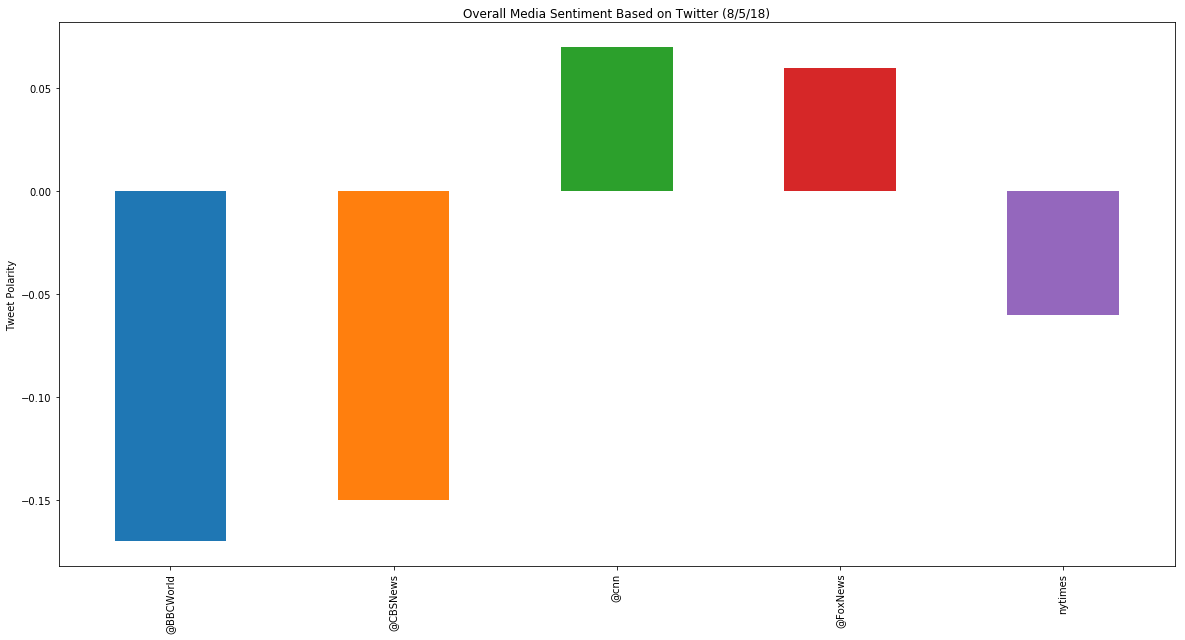

In [177]:
plt.figure(figsize=(20,10))
pol_chart = avg_polarity.plot(kind = 'bar')
plt.title('Overall Media Sentiment Based on Twitter (8/5/18)')
plt.ylabel('Tweet Polarity')

plt.show()

# Analysis of Sentiments

The scatter plot above shows that many of the tweets that were analyzed had a compound score of 0. We will consider neutral tweets to be those with a compound score between 0.1 and -0.1, tweets with a compound score that is greater than 0.1 to be positive, and tweets with a compound score that is less than -0.1 to be negative.

Fox News and CBS News lead this group with 45 neutral tweets each. This is 10 more than the outlet with the next highest total, CNN with 35. CNN, BBC and NY Times are all within 2 neutral tweets fo each other.

CNN has the most positive tweets (41) and the least negative tweets (59) of the group. Conversely, CBS and BBC have by far the most negative tweets (85 and 83 respectively) and the least positive tweets (15 and 17). These trends are reflected in the bar plot above showing the average compound snetiment for each outlet.

For 4 of the 5 news outlets that were analyzed, this data set spans 2 days, 8/4 - 8/5. BBC is the exception having a range of 4 days, 8/2 - 8/5. 100 tweets from each outlet is likely too small of a sample size to accurately assess the overall sentiment of each outlet, but this data set provides insight into the snetiment of the headlines that have been reported over the past 2 days. 

In [116]:
# df[df['model'].str.contains('ac')]
bbc = sentiments['@BBCWorld'][sentiments['@BBCWorld']['Text'].str.contains('Trump')]
cbs = sentiments['@CBSNews'][sentiments['@CBSNews']['Text'].str.contains('Trump')]
cnn = sentiments['@cnn'][sentiments['@cnn']['Text'].str.contains('Trump')]
fox = sentiments['@FoxNews'][sentiments['@FoxNews']['Text'].str.contains('Trump')]
nyt = sentiments['nytimes'][sentiments['nytimes']['Text'].str.contains('Trump')]

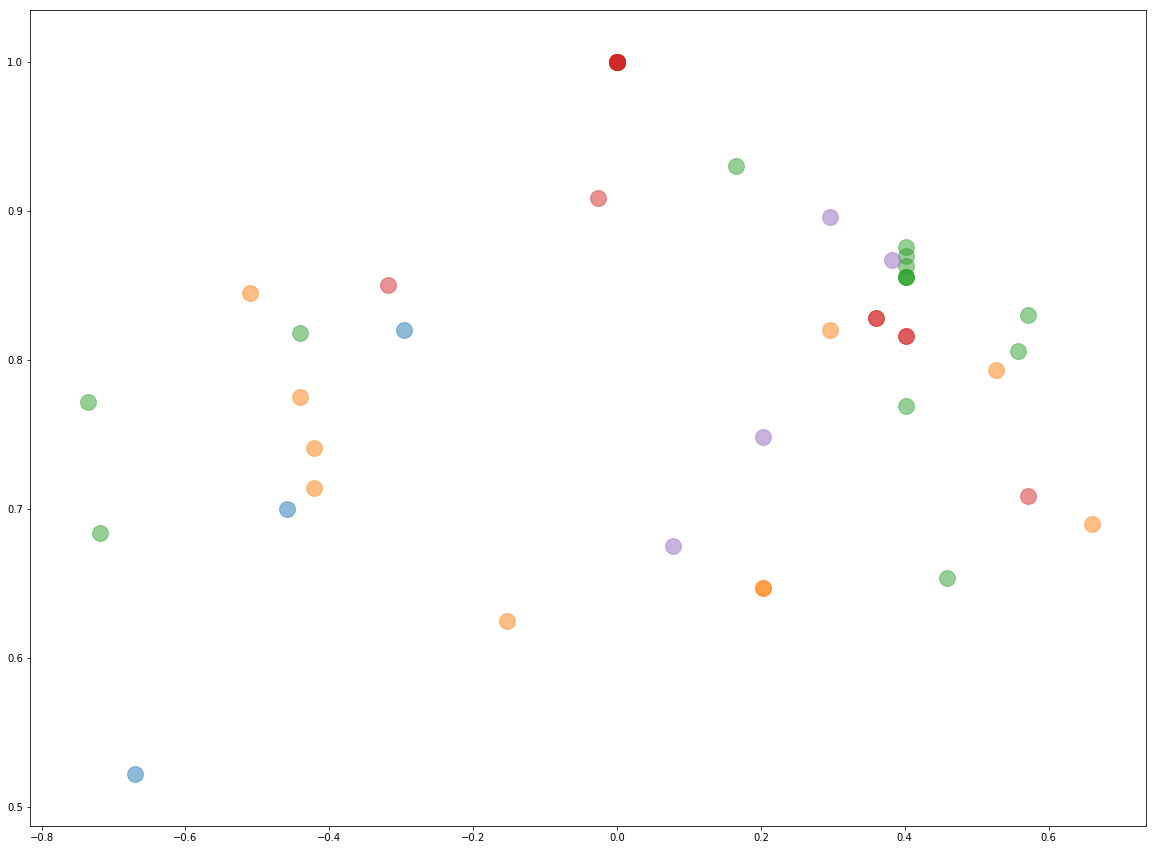

In [129]:
plt.figure(figsize=(20,15))
plt.scatter(bbc['Compound'],bbc['Neutral'], alpha = 0.5, s = 250)
plt.scatter(cbs['Compound'],cbs['Neutral'], alpha = 0.5, s = 250)
plt.scatter(cnn['Compound'],cnn['Neutral'], alpha = 0.5, s = 250)
plt.scatter(fox['Compound'],fox['Neutral'], alpha = 0.5, s = 250)
plt.scatter(nyt['Compound'],nyt['Neutral'], alpha = 0.5, s = 250)

In [137]:
# df[df['model'].str.contains('ac')]

topic = 'Russia'
bbc = sentiments['@BBCWorld'][sentiments['@BBCWorld']['Text'].str.contains(topic)]
cbs = sentiments['@CBSNews'][sentiments['@CBSNews']['Text'].str.contains(topic)]
cnn = sentiments['@cnn'][sentiments['@cnn']['Text'].str.contains(topic)]
fox = sentiments['@FoxNews'][sentiments['@FoxNews']['Text'].str.contains(topic)]
nyt = sentiments['nytimes'][sentiments['nytimes']['Text'].str.contains(topic)]

In [141]:
cnn

,Time,Positive,Negative,Neutral,Compound,Tweets Ago,Text
6,Sun Aug 05 00:18:07 +0000 2018,0.172,0.000,0.828,0.4019,7,Russia has appointed actor Steven Seagal as a ...
21,Sat Aug 04 19:55:29 +0000 2018,0.172,0.000,0.828,0.4019,22,Russia has appointed actor Steven Seagal as a ...
39,Sat Aug 04 15:34:08 +0000 2018,0.000,0.437,0.563,-0.7351,40,Russian helicopter crash kills 18 people in Si...
80,Sat Aug 04 03:31:07 +0000 2018,0.000,0.000,1.000,0.0000,81,Former CIA chief Leon Panetta on the Trump adm...
94,Sat Aug 04 02:33:05 +0000 2018,0.000,0.215,0.785,-0.6369,95,"Maria Butina, the Russian national charged wit..."


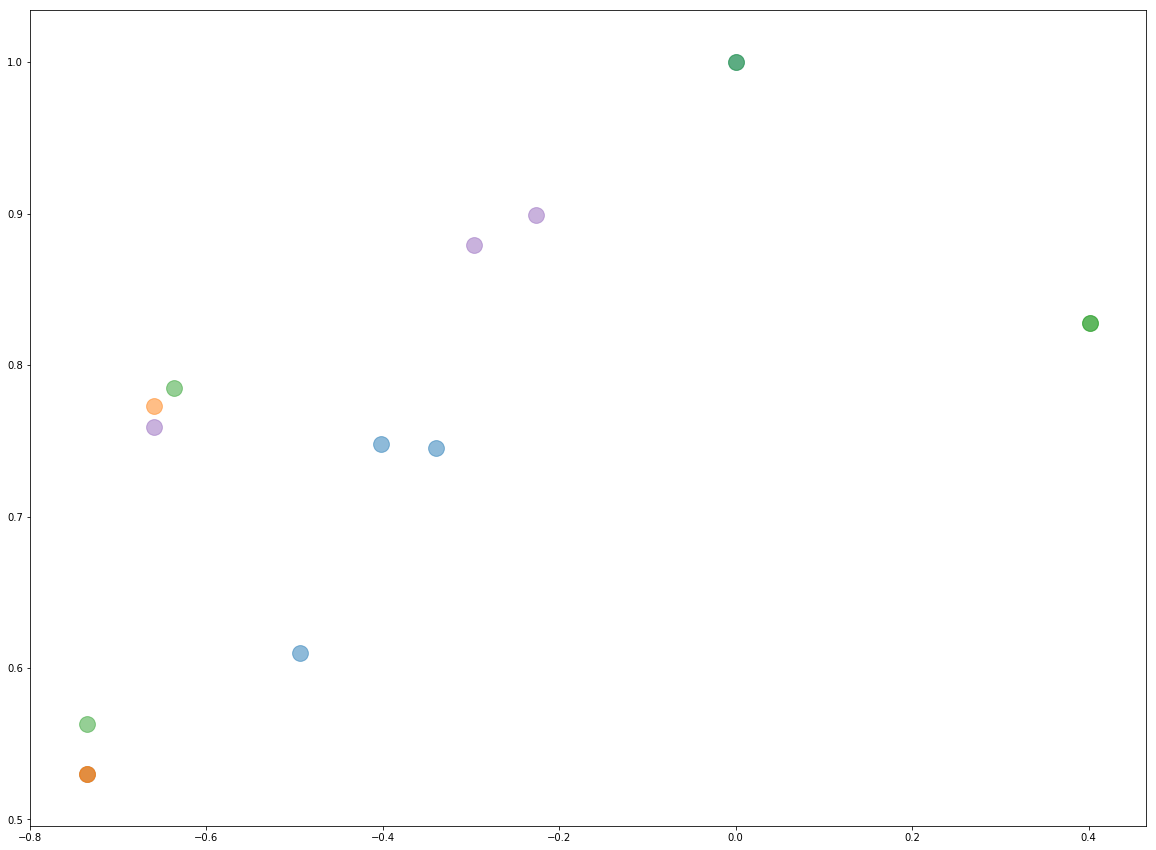

In [142]:
plt.figure(figsize=(20,15))
plt.scatter(bbc['Compound'],bbc['Neutral'], alpha = 0.5, s = 250)
plt.scatter(cbs['Compound'],cbs['Neutral'], alpha = 0.5, s = 250)
plt.scatter(cnn['Compound'],cnn['Neutral'], alpha = 0.5, s = 250)
plt.scatter(fox['Compound'],fox['Neutral'], alpha = 0.5, s = 250)
plt.scatter(nyt['Compound'],nyt['Neutral'], alpha = 0.5, s = 250)

In [149]:
# df[df['model'].str.contains('ac')]

topic = 'President'
bbc = sentiments['@BBCWorld'][sentiments['@BBCWorld']['Text'].str.contains(topic)]
cbs = sentiments['@CBSNews'][sentiments['@CBSNews']['Text'].str.contains(topic)]
cnn = sentiments['@cnn'][sentiments['@cnn']['Text'].str.contains(topic)]
fox = sentiments['@FoxNews'][sentiments['@FoxNews']['Text'].str.contains(topic)]
nyt = sentiments['nytimes'][sentiments['nytimes']['Text'].str.contains(topic)]

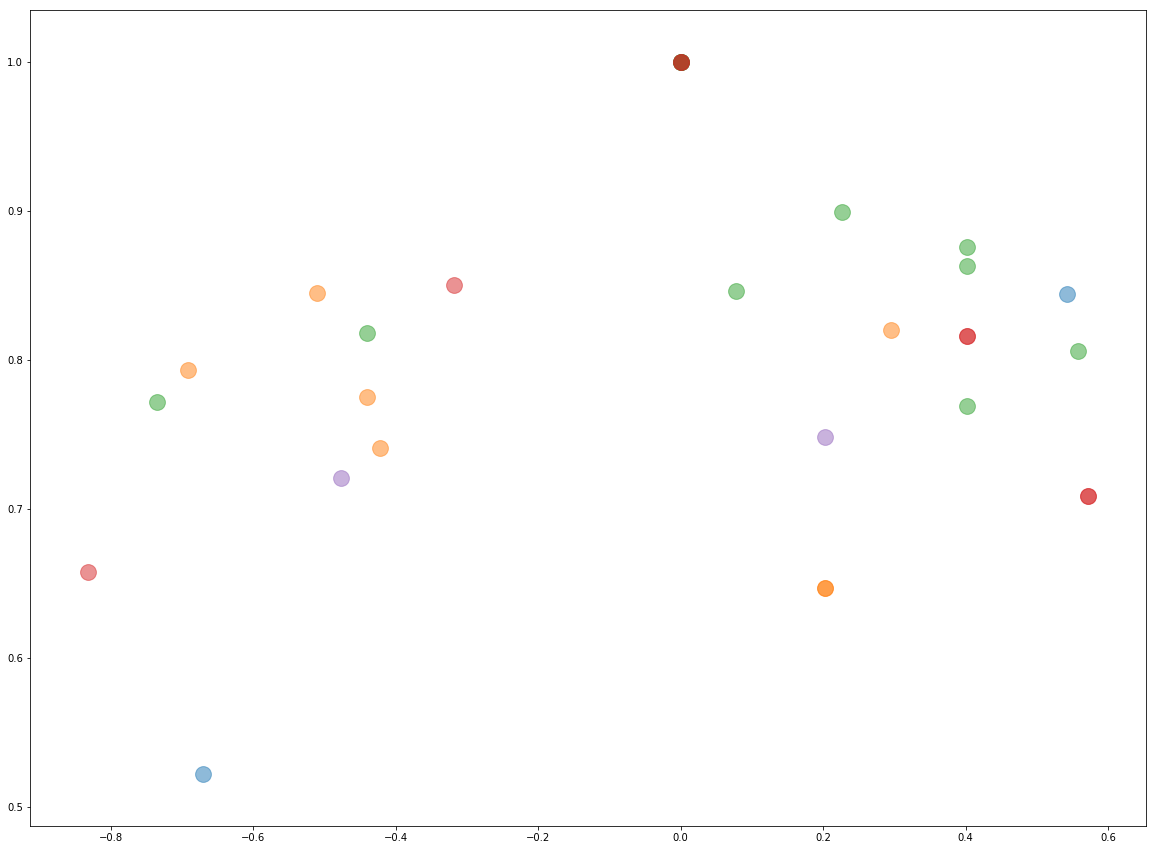

In [150]:
plt.figure(figsize=(20,15))
plt.scatter(bbc['Compound'],bbc['Neutral'], alpha = 0.5, s = 250)
plt.scatter(cbs['Compound'],cbs['Neutral'], alpha = 0.5, s = 250)
plt.scatter(cnn['Compound'],cnn['Neutral'], alpha = 0.5, s = 250)
plt.scatter(fox['Compound'],fox['Neutral'], alpha = 0.5, s = 250)
plt.scatter(nyt['Compound'],nyt['Neutral'], alpha = 0.5, s = 250)